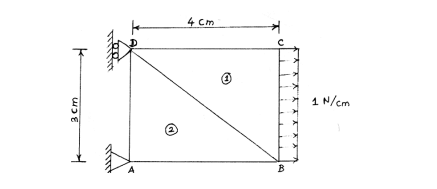

# Importando pacotes:

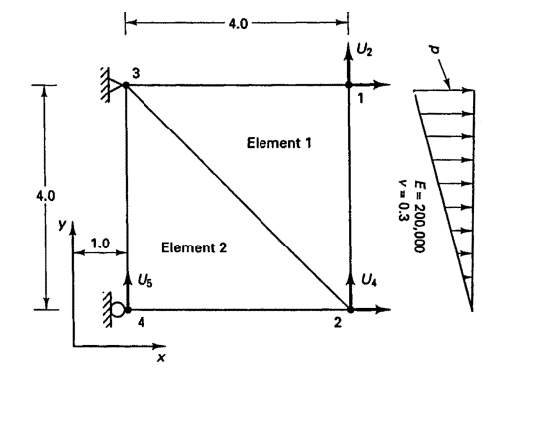

In [ ]:
import math
import numpy as np
import pandas as pd
import pylab as pl
from scipy.stats import beta
import random
import matplotlib.pyplot as plt
import sympy as sp

# Q1 (20 pontos)

Use o método de Monte Carlo para calcular a área de intereseção entre as curvas indicadas abaixo.
Para a geração de números aleatórios use o Método da Congruência Linear.

1. $y=4x$
2. $y=x\ln(x)$
3. $y=\frac{\cos{x}}{x}$
4. $y=\cosh{x}$

## Proposta de solução (utilizando o Método da Congruência Linear):

  - Aqui se encontra as funções no [GeoGebra](https://www.geogebra.org/calculator/kn3hc8y5)

In [ ]:
#Função para gerar números aleatórios pelo Método da Congruência Linear:
def mcl(p0, c, a = 3, b = 6):
  p1 = ((a * p0) + b) % c
  return p1

In [ ]:
#Função para calcular a área de intersecção das funções:
def calcArea(num):

  c_x = 1.237805   # Valor para delimitar os números aleatórios gerados no eixo X
  c_y = 2.0        # Valor para delimitar os números aleatórios gerados no eixo Y - Área 1

  cont = 0         # Contador para os pontos dentro da área procurada

  x = 47
  y = 59

  for i in range (num):
    x = mcl(x, c_x)
    y = mcl(y, c_y)

    if (x >= 0 and x <= 0.258392) and (y >= (x * np.log(x) + 0.5) and y <= (4.0*x + 0.5)):
      cont += 1
    elif (x >= 0.258392 and x <= 0.651697) and (y >= (x * np.log(x) + 0.5) and y <= np.cosh(x)):
      cont += 1
    elif (x >= 0.651697 and x <= 1.237806) and (y >= (x * np.log(x) + 0.5) and y <= (np.cos(x))/x ):
      cont += 1


  return cont

In [ ]:
iteracoes = 1000000      # Número de iterações utilizados

area = calcArea(iteracoes)

print("O número de pontos foi de: ", area)

areaInterseccao = 2.47561 * area / iteracoes
print("A área da intersecção das curvas vale: ", areaInterseccao, " unidade de medida²")

O número de pontos foi de:  495294
A área da intersecção das curvas vale:  1.22615477934  unidade de medida²


## Proposta de solução (utilizando a função Random da linguagem):

In [ ]:
def inside(x, y):

    if x <= 0.0:
        return False

    y1 = 4.0*x
    if y > y1:
        return False

    y2 = x*np.log(x)
    if y < y2:
        return False

    y3 = np.cosh(x)
    if y > y3:
        return False

    y4 = np.cos(x) / x
    if y > y4:
        return False

    return True

A área da intersecção das curvas vale:  1.176168  unidade de medida²


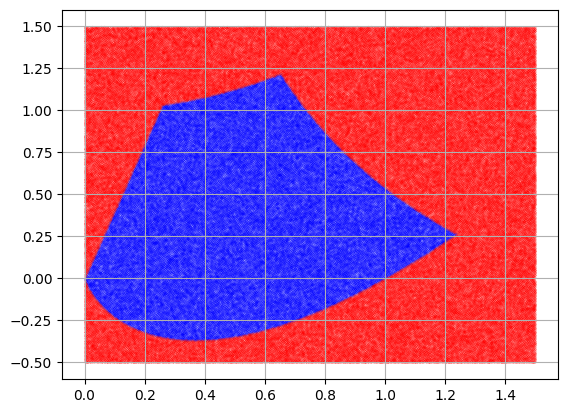

In [ ]:
rng = np.random.default_rng(135797531)

x_min =  0.0 # Valor mínimo para o  X
y_min = -0.5 # Valor mínimo para o  Y

x_max = 1.5  # Valor máximo para o  X
y_max = 1.5  # Valor máximo para o  Y

iteracoes = 1000000

cont = 0

# Pontos dentro da área:
x_plt = []
y_plt = []

# Pontos fora da área:
outX_plt = []
outY_plt = []

for k in range(0, iteracoes):

    x = x_min + (x_max - x_min)*rng.random()
    y = y_min + (y_max - y_min)*rng.random()

    if inside(x,y):
        cont += 1
        x_plt.append(x)
        y_plt.append(y)
    else:
        outX_plt.append(x)
        outY_plt.append(y)


area = (x_max - x_min)*(y_max - y_min)*cont/iteracoes
print("A área da intersecção das curvas vale: ", area, " unidade de medida²")

plt.scatter(x_plt, y_plt, s = 0.001, c="blue")
plt.scatter(outX_plt, outY_plt, s = 0.001, c="red")
plt.grid()
plt.show()

## Conclusão:

  - O problema foi resolvido utilizando tanto o Método da Congruência Linear quanto com a função Random da própria linguagens com o intuito de comparar os resultados, os quais foram próximos. Com o primeiro método, houve uma dificuldade por gerar números inteiros, enquanto que a Random() gera números reais, obtendo, assim, um resultado mais exato. Vale ressaltar que na resolução do problema pelo Método, foram utilizadas 1000000 de iterações sendo que quanto maior for este número, mais precisa a simulação se torna.


#  Q2 (30 pontos)

Considere um experimento com três urnas I, II e III. Na urna I, há 1 bola branca e 5 bolas vermelhas; na urna II, há 2 bolas brancas e 4 bolas vermelhas; e na urna III, há 3 bolas brancas e 3 bolas vermelhas. O procedimento de retirada das bolas das urnas é o seguinte:
lança-se um dado equilibrado e retira-se uma bola da urna I se o resultado do lançamento for 1, 2 ou 3; retira-se uma bola da urna II se o resultado for 4 ou 5; e por fim retira-se uma bola da urna III se o resultado for 6.

* (a) Realiza-se um experimento aleatório e a bola retirada é branca. Qual a a probabilidade de que essa bola tenha sido retirada da urna I?

Use o método de Monte Carlo para resolver este problema.


## Proposta de solução:

- 1ª Urna: 1 Branca, 5 Vermelhas
  - Retira uma bola se o dado for igual a 1, 2 ou 3
- 2ª Urna: 2 Brancas, 4 Vermelhas
  - Retira uma bola se o dado for igual a 4 ou 5
- 3ª Urna: 3 Brancas, 3 Vermelhas
  - Retira uma bola se o dado for igual a 6

---
### Seja **U1**, **U2**, **U3**, as urnas **1**, **2**, **3** respectivamente e seja:
\
  $B_1$ = Tirar bola branca da urna 1\
  $B_2$ = Tirar bola branca da urna 2\
  $B_3$ = Tirar bola branca da urna 3

\

  - Probabilidades de tirar a bola branca nas urnas 1, 2, 3:
\
$P(B_1)$ = $1/6$\
$P(B_2)$ = $1/3$\
$P(B_3)$ = $1/2$

\
  - Probabilidades das urnas:
\
$P(U_1)$ = $1/2$\
$P(U_2)$ = $1/3$\
$P(U_3)$ = $1/6$

\

  - Vamos assumir que:
\
$P(A)$ -> Representa a probabilidade de tirar uma bola branca\
$P(B)$ -> Representa a probabilidade da bola ser retirada da urna 1

\

  - Pelo Teorema de Bayes temos o seguinte:

  \begin{matrix}\\  
  P(B|A) &=& \frac{P(A|B) ⋅ P(B)}{P(A)}\\
  P(B|A) &=& \frac{P(A∩B))}{P(U_1) ⋅ P(B_1) + P(U_2) ⋅ P(B_2) + P(U_3) ⋅ P(B_3)}\\
  P(B|A) &=& \frac{\frac{1}{6} ⋅ \frac{1}{2}}{(\frac{1}{2} ⋅ \frac{1}{6}) + (\frac{1}{3} ⋅ \frac{1}{3}) + (\frac{1}{6} ⋅ \frac{1}{2})}\\
  P(B|A) &=& \frac{\frac{1}{12}}{\frac{1}{12} + \frac{1}{9} + \frac{1}{12}}\\
  P(B|A) &=& \frac{3}{10}  &=& 30\%\\
  \end{matrix}

---

### Utilizando o método de Monte Carlo, a probabilidade da bola branca sorteada ter sido retirada da Urna 1, será:

In [ ]:
# Função para sortear tanto o valor do dado quanto do índice da urna, haja vista que na urna também possui 6 valores
def jogarDado():
  return random.randint(1, 6)

In [ ]:
# Função para simular o sorteio das bolas nas urnas
def sorteio(n_sorteados):

  urna1 = ["white", "red", "red", "red", "red", "red"]
  urna2 = ["white", "white", "red", "red", "red", "red"]
  urna3 = ["white", "white", "white", "red", "red", "red"]

  contU1 = 0        # Contador para a Urna 1
  contBrancas = 0   # COntadore de bolas brancas


  for i in range (n_sorteados):
    dado = jogarDado() #Sorteio um valor para o dado

    bolaSorteada = jogarDado() - 1 #Sorteio um valor para o índice da Urna, o '-1' é para manter os valores no intervalo entre 0 a 5

    # Está na Urna 1
    if dado <= 3:
      if (urna1[bolaSorteada] == "white"): #Verificando se a bola é branca
        contU1 += 1
        contBrancas += 1

    # Está na Urna 2
    elif dado <= 5:
      if (urna2[bolaSorteada] == "white"): #Verificando se a bola é branca
        contBrancas += 1

    # Está na Urna 3
    else:
      if (urna3[bolaSorteada] == "white"): #Verificando se a bola é branca
        contBrancas += 1

  return contU1, contBrancas

In [ ]:
n_sorteados = 10000000                       #Variável utilizada para determinar o número de iterações do Método de Monte Carlo
urna1, bolasBrancas = sorteio(n_sorteados)   #Variável que vai receber o número de vezes que foi sorteada a urna 1 e o número de vezes que foi sorteada a bola branca

probabilidade = urna1 / bolasBrancas

print ("Concluiu-se, após 10000000 simulações, que a probabilidade da bola branca ter sido retirada da Urna 1 é : ", round(probabilidade, 4), "ou",  round(probabilidade*100, 2), "%.")

Concluiu-se, após 10000000 simulações, que a probabilidade da bola branca ter sido retirada da Urna 1 é :  0.3001 ou 30.01 %.


## Conclusão:

  - Inicialmente, baseando-se no Teorema de Bayes, determinamos que a probabilidade da bola branca sorteada ser da Urna1 é igual a 30%. Posteriormente, utilizando o Método de Monte Carlo, foi encontrado um valor muito próximo. Vale ressaltar que na resolução do problema pelo Método, foram utilizadas 10000000 de iterações sendo que quanto maior for este número, mais precisa a simulação se torna.



# Q3 (50 pontos)


Acesse o  [projeto Gutenberg](https://www.gutenberg.org) e estabeleça um critério para selecionar 2 conjuntos de dados com pelo menos 25 livros distintos. O critério de escolha pode ser o autor, gênero literário, idioma, região geográfica, década ou períoda da história entre outros.

Para cada livro do conjunto de dados calcule o coeficiente de Zipf. A partir daí apresente de forma gráfica a distribuição dos coeficientes para cada conjunto.

Discuta os resultados apresentados.



## Proposta de solução:

In [ ]:
# Importação dos livros do projeto de Gutenberg
import requests

# Livros de William Shakespeare
url_0  = "https://www.gutenberg.org/files/1513/1513-0.txt"    # Romeu e Julieta
url_1  = "https://www.gutenberg.org/files/100/100-0.txt"      # The Complete Works of William Shakespeare
url_2  = "https://www.gutenberg.org/files/23042/23042-0.txt"  # The Tempest
url_3  = "https://www.gutenberg.org/files/1514/1514-0.txt"    # A Midsummer Night’s Dream
url_4  = "https://www.gutenberg.org/files/1524/1524-0.txt"    # Hamlet
url_5  = "https://www.gutenberg.org/files/1533/1533-0.txt"    # Macbeth
url_6  = "https://www.gutenberg.org/files/1430/1430-0.txt"    # Beautiful Stories from Shakespeare
url_7  = "https://www.gutenberg.org/files/1519/1519-0.txt"    # Much Ado about Nothing
url_8  = "https://www.gutenberg.org/files/1515/1515-0.txt"    # The Merchant of Venice
url_9  = "https://www.gutenberg.org/files/1532/1532-0.txt"    # The Tragedy of King Lear
url_10 = "https://www.gutenberg.org/files/1041/1041-0.txt"    # Shakespeare's Sonnets
url_11 = "https://www.gutenberg.org/files/1112/1112.txt"      # The Tragedy of Romeo and Juliet
url_12 = "https://www.gutenberg.org/files/23046/23046-0.txt"  # The Comedy of Errors
url_13 = "https://www.gutenberg.org/files/1522/1522-0.txt"    # Julius Caesar
url_14 = "https://www.gutenberg.org/files/1531/1531-0.txt"    # Othello, the Moor of Venice
url_15 = "https://www.gutenberg.org/files/1526/1526-0.txt"    # Twelfth Night; Or, What You Will
url_16 = "https://www.gutenberg.org/files/1523/1523-0.txt"    # As You Like It
url_17 = "https://www.gutenberg.org/files/1508/1508-0.txt"    # The Taming of the Shrew
url_18 = "https://www.gutenberg.org/files/23045/23045-8.txt"  # Measure for Measure
url_19 = "https://www.gutenberg.org/files/1503/1503-0.txt"    # King Richard III
url_20 = "https://www.gutenberg.org/files/1534/1534-0.txt"    # Antony and Cleopatra
url_21 = "https://www.gutenberg.org/files/1529/1529-0.txt"    # All's Well That Ends Well
url_22 = "https://www.gutenberg.org/files/1539/1539-0.txt"    # The Winter's Tale
url_23 = "https://www.gutenberg.org/files/23044/23044-0.txt"  # The Merry Wives of Windsor
url_24 = "https://www.gutenberg.org/files/1794/1794.txt"      # King Lear
books_shakespeare = [url_0, url_1, url_2, url_3, url_4, url_5, url_6, url_7, url_8, url_9, url_10, url_11, url_12, url_13, url_14, url_15, url_16, url_17, url_18, url_19, url_20, url_21, url_22, url_23, url_24]
response_shakespeare = []
data_shakespeare = []
# Livros de Biologia
url_25  = "https://www.gutenberg.org/files/1228/1228-0.txt"    # On the Origin of Species By Means of Natural Selection
url_26  = "https://www.gutenberg.org/files/22748/22748-8.txt"  # Explanation of Terms Used in Entomology
url_27  = "https://www.gutenberg.org/files/13249/13249.txt"    # Our Vanishing Wild Life: Its Extermination and Preservation
url_28  = "https://www.gutenberg.org/files/15707/15707-8.txt"  # Zoonomia; Or, the Laws of Organic Life, Vol. I
url_29  = "https://www.gutenberg.org/files/18350/18350-8.txt"  # Social Life in the Insect World
url_30  = "https://www.gutenberg.org/files/8508/8508-8.txt"    # The Evolution Of Man Scientifically Disproved
url_31  = "https://www.gutenberg.org/files/23755/23755-8.txt"  # Birds of the Indian Hills
url_32  = "https://www.gutenberg.org/files/23434/23434-8.txt"  # An Elementary Study of Insects
url_33  = "https://www.gutenberg.org/files/18911/18911-8.txt"  # Biology
url_34  = "https://www.gutenberg.org/files/1909/1909.txt"      # Darwin and Modern Science
url_35 = "https://www.gutenberg.org/files/24409/24409-8.txt"   # Our Common Insects
url_36 = "https://www.gutenberg.org/files/22165/22165-8.txt"   # My Studio Neighbors
url_37 = "https://www.gutenberg.org/files/22430/22430-0.txt"   # Evolution in Modern Thought
url_38 = "https://www.gutenberg.org/files/20818/20818-8.txt"   # On the Genesis of Species
url_39 = "https://www.gutenberg.org/files/19850/19850-8.txt"   # The Human Side of Animals
url_40 = "https://www.gutenberg.org/files/3332/3332-0.txt"     # The Variation of Animals and Plants under Domestication
url_41 = "https://www.gutenberg.org/files/20556/20556-0.txt"   # Lamarck, the Founder of Evolution: His Life and Work
url_42 = "https://www.gutenberg.org/files/20426/20426-8.txt"   # Form and Function: A Contribution to the History of Animal Morphology
url_43 = "https://www.gutenberg.org/files/16487/16487-8.txt"   # The Story of the Living Machine
url_44 = "https://www.gutenberg.org/files/6052/6052.txt"       # The Minds and Manners of Wild Animals: A Book of Personal Observations
url_45 = "https://www.gutenberg.org/files/7234/7234.txt"       # Species and Varieties, Their Origin by Mutation
url_46 = "https://www.gutenberg.org/files/21111/21111-8.txt"   # Wild Nature Won By Kindness
url_47 = "https://www.gutenberg.org/files/21138/21138-8.txt"   # Love's Meinie: Three Lectures on Greek and English Birds
url_48 = "https://www.gutenberg.org/files/22428/22428-8.txt"   # Contributions to the Theory of Natural Selection
url_49 = "https://www.gutenberg.org/files/10962/10962-8.txt"   # Concerning Animals and Other Matters
books_biology = [url_25, url_26, url_27, url_28, url_29, url_30, url_31, url_32, url_33, url_34, url_35, url_36, url_37, url_38, url_39, url_40, url_41, url_42, url_43, url_44, url_45, url_46, url_47, url_48, url_49]
response_biology = []
data_biology = []


for i in range(len(books_shakespeare)):
  response_shakespeare.append(requests.get(books_shakespeare[i]))
  data_shakespeare.append(response_shakespeare[i].text)
  str_remove = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789"
  tr = str.maketrans("", "", str_remove)
  data_shakespeare[i] = data_shakespeare[i].translate(tr)

for i in range(len(books_biology)):
  response_biology.append(requests.get(books_biology[i]))
  data_biology.append(response_biology[i].text)
  str_remove = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789"
  tr = str.maketrans("", "", str_remove)
  data_biology[i] = data_biology[i].translate(tr)





In [ ]:
import collections
import numpy as np
import pylab as pl
words_shakespeare = []
word_freq_shakespeare = []
top_word_freq_shakespeare = []

words_biology = []
word_freq_biology = []
top_word_freq_biology = []



for i in range(len(books_shakespeare)):
  words_shakespeare.append(data_shakespeare[i].split())
  top=100
  word_freq_shakespeare.append(collections.Counter(words_shakespeare[i]))
  top_word_freq_shakespeare.append(word_freq_shakespeare[i].most_common(top))

for i in range(len(books_biology)):
  words_biology.append(data_biology[i].split())
  top=100
  word_freq_biology.append(collections.Counter(words_biology[i]))
  top_word_freq_biology.append(word_freq_biology[i].most_common(top))

In [ ]:
import pandas as pd

#tabela das ocorrências de cada livro de Shakespeare (basta mudar o índice)
id=0
freq_shakespeare=pd.DataFrame(top_word_freq_shakespeare[id])
freq_shakespeare

,0,1
0,the,780
1,I,580
2,and,549
3,to,534
4,of,478
...,...,...
95,should,48
96,any,48
97,must,48
98,work,48


In [ ]:
freq_shakespeare[1].values

array([780, 580, 549, 534, 478, 460, 359, 327, 323, 304, 285, 274, 270,
       262, 250, 235, 218, 214, 203, 185, 167, 151, 149, 144, 143, 135,
       134, 131, 130, 127, 122, 122, 121, 111, 108, 103, 101, 100,  99,
        98,  97,  97,  96,  95,  91,  91,  87,  86,  85,  85,  83,  83,
        82,  80,  80,  77,  74,  73,  71,  68,  65,  64,  64,  64,  63,
        62,  61,  61,  61,  61,  61,  60,  60,  59,  57,  57,  57,  56,
        56,  56,  56,  55,  55,  54,  54,  53,  51,  51,  51,  51,  50,
        49,  49,  49,  49,  48,  48,  48,  48,  47])

<Axes: >

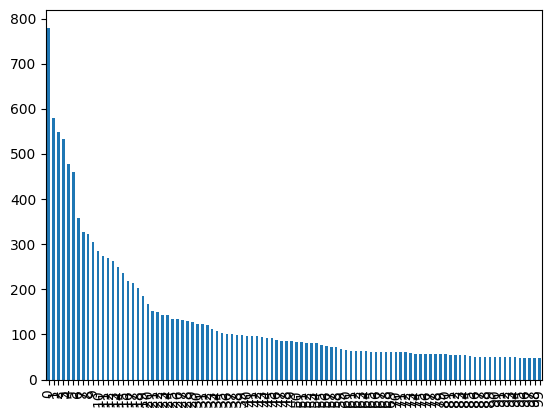

In [ ]:
freq_shakespeare[1].plot(kind='bar')

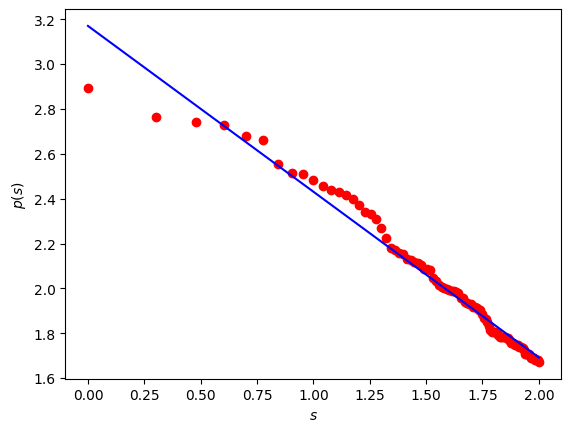

Coeficiente de Zipf para o livro 1 de Shakespeare:  
-0.7392 x + 3.17


In [ ]:
x=np.log10(freq_shakespeare.index.values+1)
y=np.log10(freq_shakespeare[1].values)
cc=np.polyfit(x,y, deg=1);
pol=np.poly1d(cc)
pl.plot(x,y,'ro', x,pol(x), 'b')
pl.xlabel('$s$');  pl.ylabel('$p(s)$');
pl.show()
print('Coeficiente de Zipf para o livro', id+1, 'de Shakespeare:',pol)

In [ ]:
import pandas as pd

#tabela das ocorrências de cada livro de Biologia (basta mudar o índice)
id=0
freq_biology=pd.DataFrame(top_word_freq_biology[id])
freq_biology

,0,1
0,the,10020
1,of,7945
2,and,4423
3,in,3818
4,to,3658
...,...,...
95,new,206
96,during,205
97,number,204
98,how,203


In [ ]:
freq_biology[1].values

array([10020,  7945,  4423,  3818,  3658,  2441,  2053,  1768,  1673,
        1491,  1471,  1430,  1393,  1358,  1253,  1234,  1163,  1120,
        1068,  1015,   988,   940,   932,   893,   892,   885,   793,
         759,   744,   710,   681,   626,   622,   612,   610,   576,
         549,   548,   540,   532,   521,   520,   502,   486,   453,
         441,   432,   417,   414,   410,   402,   402,   391,   377,
         364,   350,   340,   337,   330,   326,   305,   299,   292,
         289,   285,   282,   282,   282,   277,   270,   264,   259,
         257,   257,   253,   251,   249,   246,   246,   243,   242,
         241,   240,   234,   230,   223,   220,   220,   216,   216,
         216,   216,   213,   210,   208,   206,   205,   204,   203,
         203])

<Axes: >

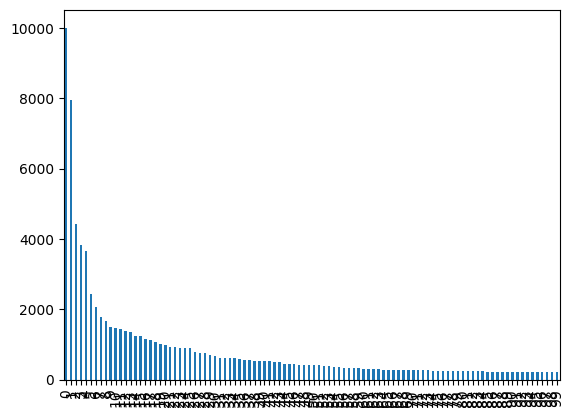

In [ ]:
freq_biology[1].plot(kind='bar')

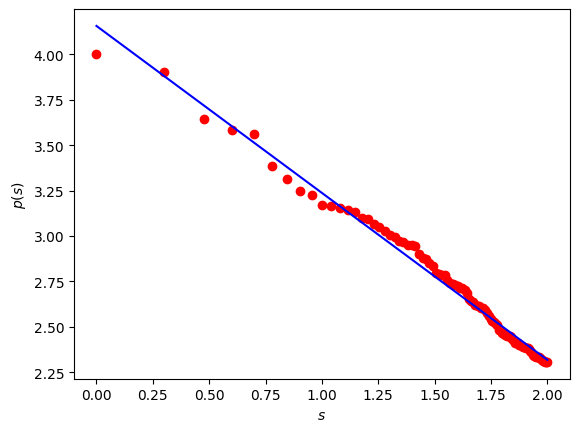

Coeficiente de Zipf para o livro 1 de Biologia:  
-0.9187 x + 4.156


In [ ]:
x=np.log10(freq_biology.index.values+1)
y=np.log10(freq_biology[1].values)
cc=np.polyfit(x,y, deg=1);
pol=np.poly1d(cc)
pl.plot(x,y,'ro', x,pol(x), 'b')
pl.xlabel('$s$');  pl.ylabel('$p(s)$');
pl.show()
print('Coeficiente de Zipf para o livro', id+1, 'de Biologia:',pol)

In [ ]:
#Para todas as palavras de Shakespeare
total_word_freq_shakespeare = collections.Counter()

for i in books_shakespeare:
    response = requests.get(i)
    text = response.text
    str_remove = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789"
    tr = str.maketrans("", "", str_remove)
    text = text.translate(tr)
    palavras = text.split()
    total_word_freq_shakespeare.update(palavras)

top = 100
total_top_word_freq_shakespeare = total_word_freq_shakespeare.most_common(top)

print('Shakespeare:', total_top_word_freq_shakespeare)


#Para todas as palavras de Biologia
total_word_freq_biology = collections.Counter()

for i in books_biology:
    response = requests.get(i)
    text = response.text
    str_remove = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789"
    tr = str.maketrans("", "", str_remove)
    text = text.translate(tr)
    palavras = text.split()
    total_word_freq_biology.update(palavras)

top = 100
total_top_word_freq_biology = total_word_freq_biology.most_common(top)

print('Biologia:',total_top_word_freq_biology)


Shakespeare: [('the', 46333), ('I', 36111), ('and', 35069), ('to', 30504), ('of', 30483), ('a', 24110), ('you', 22855), ('in', 19771), ('my', 18713), ('is', 15251), ('that', 14956), ('not', 14780), ('me', 13626), ('with', 13108), ('And', 12770), ('it', 12384), ('be', 11530), ('his', 11215), ('for', 10686), ('your', 10606), ('this', 10480), ('have', 9674), ('he', 9312), ('him', 9277), ('will', 8057), ('as', 7824), ('thou', 7789), ('her', 7782), ('The', 7485), ('so', 7063), ('but', 6464), ('all', 6343), ('thy', 6098), ('do', 6055), ('are', 5981), ('by', 5920), ('To', 5877), ('thee', 5510), ('on', 5418), ('shall', 5406), ('no', 4999), ('That', 4866), ('or', 4825), ('But', 4683), ('from', 4472), ('at', 4465), ('we', 4426), ('our', 4377), ('was', 4284), ('A', 3992), ('good', 3980), ('she', 3945), ('What', 3944), ('O', 3926), ('what', 3830), ('am', 3783), ('love', 3768), ('more', 3708), ('Enter', 3685), ('would', 3684), ('now', 3487), ('they', 3481), ('sir', 3414), ('if', 3402), ('them', 335

In [ ]:
import pandas as pd

#tabela das ocorrências de todos os livros do conjunto de Shakespeare
total_freq_shakespeare=pd.DataFrame(total_top_word_freq_shakespeare)
total_freq_shakespeare

,0,1
0,the,46333
1,I,36111
2,and,35069
3,to,30504
4,of,30483
...,...,...
95,As,2437
96,there,2436
97,see,2372
98,such,2323


In [ ]:
total_freq_shakespeare[1].values

array([46333, 36111, 35069, 30504, 30483, 24110, 22855, 19771, 18713,
       15251, 14956, 14780, 13626, 13108, 12770, 12384, 11530, 11215,
       10686, 10606, 10480,  9674,  9312,  9277,  8057,  7824,  7789,
        7782,  7485,  7063,  6464,  6343,  6098,  6055,  5981,  5920,
        5877,  5510,  5418,  5406,  4999,  4866,  4825,  4683,  4472,
        4465,  4426,  4377,  4284,  3992,  3980,  3945,  3944,  3926,
        3830,  3783,  3768,  3708,  3685,  3684,  3487,  3481,  3414,
        3402,  3358,  3344,  3330,  3293,  3199,  3188,  2987,  2893,
        2868,  2866,  2836,  2825,  2820,  2764,  2750,  2746,  2744,
        2739,  2711,  2678,  2654,  2644,  2643,  2624,  2611,  2605,
        2579,  2556,  2534,  2467,  2461,  2437,  2436,  2372,  2323,
        2290])

<Axes: >

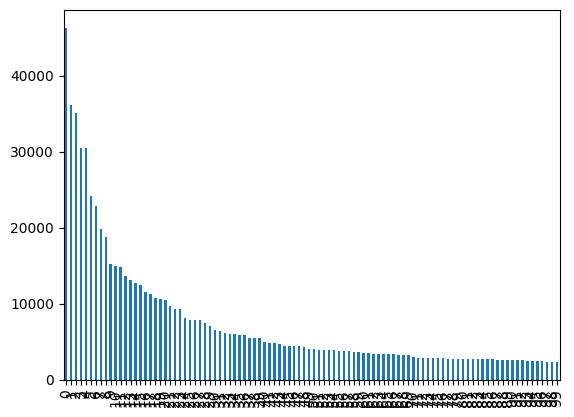

In [ ]:
total_freq_shakespeare[1].plot(kind='bar')

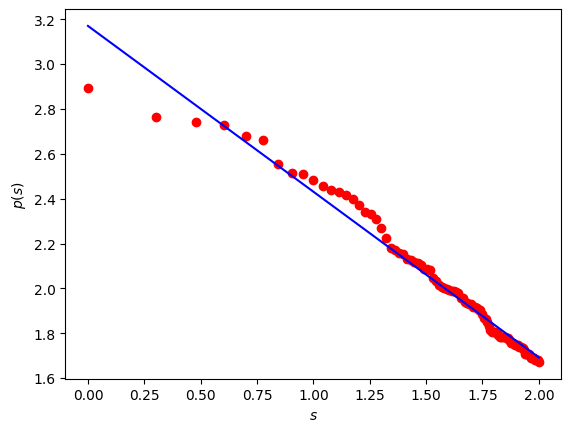

Coeficiente de Zipf para o conjunto de livros de Shakespeare:  
-0.7392 x + 3.17


In [ ]:
x=np.log10(freq_shakespeare.index.values+1)
y=np.log10(freq_shakespeare[1].values)
cc=np.polyfit(x,y, deg=1);
pol=np.poly1d(cc)
pl.plot(x,y,'ro', x,pol(x), 'b')
pl.xlabel('$s$');  pl.ylabel('$p(s)$');
pl.show()
print('Coeficiente de Zipf para o conjunto de livros de Shakespeare:',pol)

In [ ]:
import pandas as pd

#tabela das ocorrências dos livros do conjunto de Biologia
total_freq_biology=pd.DataFrame(total_top_word_freq_biology)
total_freq_biology

,0,1
0,the,189854
1,of,136840
2,and,77356
3,in,61263
4,to,58534
...,...,...
95,different,2539
96,about,2518
97,part,2517
98,wild,2441


In [ ]:
total_freq_biology[1].values

array([189854, 136840,  77356,  61263,  58534,  49296,  35042,  29937,
        23076,  20885,  20628,  20536,  19710,  18912,  18898,  17926,
        15433,  15289,  15183,  14983,  14612,  13302,  13185,  10570,
         9860,   9678,   9629,   9526,   9005,   8733,   8520,   8469,
         8327,   8312,   8241,   8206,   7958,   7660,   7458,   7188,
         6500,   6222,   6173,   6163,   5835,   5464,   5463,   5314,
         5259,   5213,   5189,   5129,   5117,   5114,   4950,   4859,
         4699,   4630,   4588,   4490,   4347,   4331,   4114,   4060,
         4028,   4028,   3921,   3805,   3600,   3573,   3534,   3459,
         3442,   3419,   3392,   3236,   3233,   2982,   2942,   2907,
         2901,   2874,   2873,   2863,   2845,   2837,   2821,   2762,
         2682,   2667,   2666,   2657,   2642,   2561,   2540,   2539,
         2518,   2517,   2441,   2437])

<Axes: >

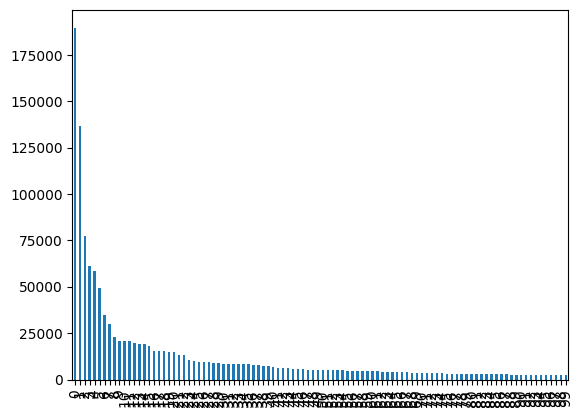

In [ ]:
total_freq_biology[1].plot(kind='bar')

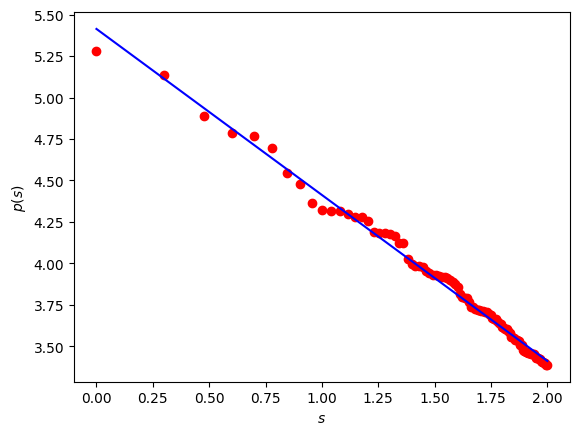

Coeficiente de Zipf para o conjunto dos livros de Biologia:  
-1.002 x + 5.414


In [ ]:
x=np.log10(total_freq_biology.index.values+1)
y=np.log10(total_freq_biology[1].values)
cc=np.polyfit(x,y, deg=1);
pol=np.poly1d(cc)
pl.plot(x,y,'ro', x,pol(x), 'b')
pl.xlabel('$s$');  pl.ylabel('$p(s)$');
pl.show()
print('Coeficiente de Zipf para o conjunto dos livros de Biologia:',pol)

## Conclusão:

  - Analisando os resultados dos livros dos conjuntos individualmente, é possível observar que as palavras que mais se repetem são semelhantes, por pertencerem a livros do mesmo Autor/Gênero.
  - Comparando os dois conjuntos, podemos perceber que em ambos as principais palavras são: pronomes pessoais do caso oblíquo, como "the", preposições como "to", "of", e conjunções como "and". Entretanto, foi possível notar que a principal diferença entre eles é que nos livros de Shakespeare aparecem pronomes pessoais do caso reto, como "I", por se tratarem de livros de literatura, enquanto que nos livros de biologia, isso não acontece por serem livros científicos.
  - Analisando os gráficos, conclui-se que os valores das frequências menores de ambos os conjuntos coincidem mais precisamente com a reta traçada pelo Coeficiente de Zipf.
